#### Importing the library

In [29]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error
from sklearn.linear_model import ARDRegression, BayesianRidge, ElasticNet, GammaRegressor, HuberRegressor, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

#### Listing all algorithms

In [30]:
regression_functions = [SVR,DecisionTreeRegressor,ARDRegression,BayesianRidge,ElasticNet,GammaRegressor,HuberRegressor,Lasso,Ridge,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor]

#### Loading dataset in to Pandas Dataframe

In [31]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Simple data cleaning

- Dropna
- Drop Duplicated
- Converting dtype: {
    Gender: int16,
}

In [32]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [33]:
df.shape

(1787, 6)

#### Converting **"Gender"** to number form
- Male: 0
- Female: 1

In [34]:
df['Gender'].replace({'Male':0, 'Female':1, 'Other':3}, inplace=True)
df['Education Level'].replace({'phD':'PhD'}, inplace=True)
df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1793,31.0,0,Bachelor's Degree,Full Stack Engineer,6.0,115000.0
2624,31.0,0,Master's Degree,Back end Developer,8.0,111535.0
2392,52.0,1,Master's Degree,Senior Software Engineer,28.0,186963.0
5378,26.0,1,Bachelor's Degree,Graphic Designer,2.0,50000.0
4578,42.0,0,PhD,Director of HR,14.0,130000.0


#### Heatmap on Correaltion

<AxesSubplot:>

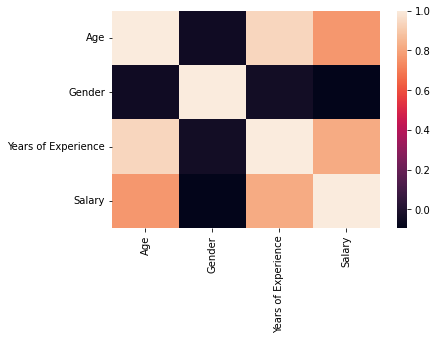

In [35]:
sns.heatmap(df.corr())

#### Train Test spliting and **"Salary"** column np.log

In [36]:
X = df.drop(columns=['Salary'])
Y = df['Salary']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.15)

#### Appling Column Transformer
- Onehot encondig

In [38]:
transform_col = ['Education Level', 'Job Title']
step1 = ColumnTransformer([('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), transform_col)], remainder='passthrough')

#### Building Pipepline and Testing on all Algorithims

In [39]:
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE Score'])
for model_class in regression_functions:
    model = Pipeline([
        ('step1', step1),
        ('step2', model_class())
    ])
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    model_name = model_class.__name__
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE Score': mae}, ignore_index=True)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\Dell\AppData\Local\Temp\ipykernel_25508\3635114969.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE Score': mae}, ignore_index=True)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Dell\AppData\Local\Temp\ipykernel_25508\3635114969.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE Score': mae}, ignore_index=True)
C:\Users\Dell\

#### Sorting the R2 Score

In [40]:
    
results_df = results_df.sort_values(by='MAE Score', ascending=True)
results_df


,Model,R2 Score,MAE Score
10,ExtraTreesRegressor,0.922811,9066.414616
11,BaggingRegressor,0.923064,9323.589759
13,RandomForestRegressor,0.923272,9415.312995
1,DecisionTreeRegressor,0.872991,11049.079926
12,GradientBoostingRegressor,0.896929,12695.52323
6,HuberRegressor,0.854805,13962.643103
3,BayesianRidge,0.863671,14176.940137
8,Ridge,0.863488,14182.669581
7,Lasso,0.860073,14341.618278
2,ARDRegression,0.847458,15362.888855


#### Saved to csv file

In [41]:
results_df.to_csv('result-on-test-data.csv', index=False)

#### Hypertunning to Maximize MAE of algorithims on top of result

In [42]:
# Define the parameter grid
param_grid = {
    'step2__n_estimators': [100, 200, 300],
    'step2__max_depth': [None, 5, 10],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4],
}

# Create the pipeline with preprocessing step and ExtraTreesRegressor
model = Pipeline([
    ('step1', step1),
    ('step2', ExtraTreesRegressor())
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

Y_pred = best_model.predict(X_test)


mae = mean_absolute_error(Y_test, Y_pred)
print(f"Best model MAE on test data: {mae}")


#### Selected best model after hypertunning

In [43]:
model = Pipeline([
    ('step1', step1),
    ('step2', ExtraTreesRegressor(n_estimators=300, min_samples_leaf=1, min_samples_split=6))
])
    
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

model_name = model_class.__name__
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print("R2 score: ",r2)
print("MAE score: ",mae)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score:  0.9293733767455241
MAE score:  8926.516577860397


#### Exporting the model using pickle

In [44]:
pickle.dump(model, open('ExtraTreesRegressor.pkl', 'wb'))

#### Exporting the Dataframe using pickle

In [45]:
export_df = df[['Education Level', 'Job Title']]

In [46]:
pickle.dump(export_df.to_dict(), open('exported-df.pkl', 'wb'))